In [26]:
import pandas as pd
import numpy as np
import math, copy
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv(r"c:\Users\barat\OneDrive\Desktop\Linear-Regression-Single-Input\datasets\salary_experience\Salary_dataset.csv")
print("First 5 samples")
print(df.head())

First 5 samples
   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [28]:
x_train = df["YearsExperience"].values
y_train = df["Salary"].values


In [29]:
print(f"x_train : {x_train}")
print(f"y_train : {y_train}")

x_train : [ 1.2  1.4  1.6  2.1  2.3  3.   3.1  3.3  3.3  3.8  4.   4.1  4.1  4.2
  4.6  5.   5.2  5.4  6.   6.1  6.9  7.2  8.   8.3  8.8  9.1  9.6  9.7
 10.4 10.6]
y_train : [ 39344.  46206.  37732.  43526.  39892.  56643.  60151.  54446.  64446.
  57190.  63219.  55795.  56958.  57082.  61112.  67939.  66030.  83089.
  81364.  93941.  91739.  98274. 101303. 113813. 109432. 105583. 116970.
 112636. 122392. 121873.]


In [30]:
x_mean = x_train.mean()
x_std = x_train.std()
x_train = (x_train - x_mean)/x_std

In [31]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i]) ** 2
    total_cost = 1 / (2 * m) * cost
    return total_cost

In [32]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db 

In [33]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)

        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history

In [34]:
w_init = 0
b_init = 0
temp_alpha = 0.01
iteration = 1000
w_final, b_final, J_hist, P_hist = gradient_descent(x_train, y_train, w_init, b_init, temp_alpha, iteration, compute_cost, compute_gradient)

Iteration    0: Cost 3.19e+09  dj_dw: -2.637e+04, dj_db: -7.600e+04   w:  2.637e+02, b: 7.60040e+02
Iteration  100: Cost 4.41e+08  dj_dw: -9.651e+03, dj_db: -2.782e+04   w:  1.681e+04, b: 4.84623e+04
Iteration  200: Cost 7.26e+07  dj_dw: -3.533e+03, dj_db: -1.018e+04   w:  2.287e+04, b: 6.59228e+04
Iteration  300: Cost 2.33e+07  dj_dw: -1.293e+03, dj_db: -3.727e+03   w:  2.509e+04, b: 7.23140e+04
Iteration  400: Cost 1.67e+07  dj_dw: -4.733e+02, dj_db: -1.364e+03   w:  2.590e+04, b: 7.46533e+04
Iteration  500: Cost 1.58e+07  dj_dw: -1.732e+02, dj_db: -4.994e+02   w:  2.620e+04, b: 7.55096e+04
Iteration  600: Cost 1.57e+07  dj_dw: -6.341e+01, dj_db: -1.828e+02   w:  2.630e+04, b: 7.58230e+04
Iteration  700: Cost 1.56e+07  dj_dw: -2.321e+01, dj_db: -6.691e+01   w:  2.634e+04, b: 7.59378e+04
Iteration  800: Cost 1.56e+07  dj_dw: -8.496e+00, dj_db: -2.449e+01   w:  2.636e+04, b: 7.59798e+04
Iteration  900: Cost 1.56e+07  dj_dw: -3.110e+00, dj_db: -8.964e+00   w:  2.636e+04, b: 7.59951e+04


In [35]:
w = w_final
b = b_final
print(f"w : {w}")
print(f"b : {b}")

w : 26366.044139385645
b : 76000.7188125118


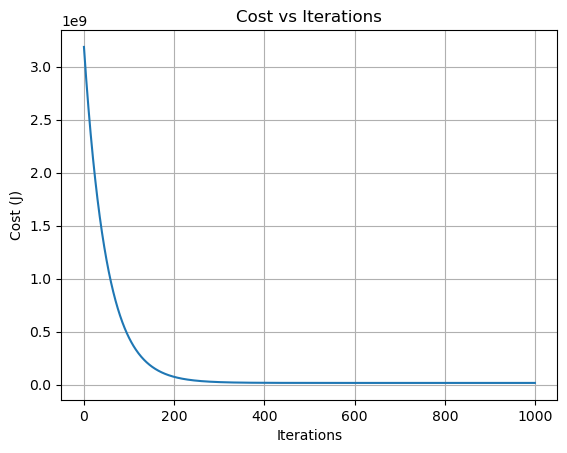

In [56]:
iterations = np.arange(len(J_hist))
plt.figure()
plt.plot(iterations, J_hist)
plt.xlabel("Iterations")
plt.ylabel("Cost (J)")
plt.title("Cost vs Iterations")
plt.grid(True)
plt.savefig("results/cost_vs_iterations.png")
plt.show()

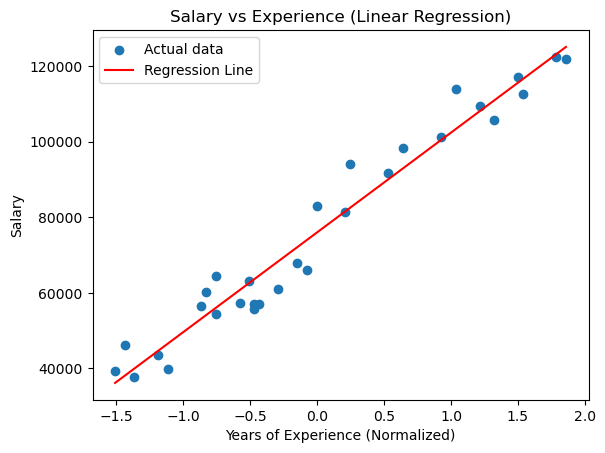

In [57]:
y_predict = w * x_train + b
plt.figure()
plt.scatter(x_train, y_train, label= "Actual data")
plt.plot(x_train, y_predict, color = "red", label="Regression Line")
plt.xlabel("Years of Experience (Normalized)")
plt.ylabel("Salary")
plt.legend()
plt.title("Salary vs Experience (Linear Regression)")
plt.savefig("results/regression_line.png")
plt.show()


In [61]:
x_input = float(input("Enter Years of Experience: "))
x_userInput = (x_input - x_mean) / x_std
y_predict = w * x_userInput + b
print(f"Salary :{y_predict:.2f}")

Enter Years of Experience:  10


Salary :119342.67
